In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt

Check if code and data "live" in the same path.

In [2]:
df=pd.read_csv('package_tracking_df_2.csv')

In [3]:
df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.columns

Index(['package_id', 'agreed_slo', 'mesoregion', 'real_weight',
       'deadline_time', 'first_delivery_attempt_time',
       'last_mile_driver_pickup_time', 'task_id', 'itinerary_id', 'type',
       'ack_status', 'waypoint_role', 'completed_at', 'city', 'status',
       'transport_type', 'product', 'product_version', 'distribution_center',
       'created', 'checked_in_at', 'pickup_checkout_at',
       'expected_completion_time'],
      dtype='object')

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

package_id                       object
agreed_slo                       object
mesoregion                       object
real_weight                     float64
deadline_time                    object
first_delivery_attempt_time      object
last_mile_driver_pickup_time     object
task_id                          object
itinerary_id                     object
type                             object
ack_status                       object
waypoint_role                    object
completed_at                     object
city                             object
status                           object
transport_type                   object
product                          object
product_version                  object
distribution_center              object
created                          object
checked_in_at                    object
pickup_checkout_at               object
expected_completion_time          int64
dtype: object

In [7]:
df.head()

,package_id,agreed_slo,mesoregion,real_weight,deadline_time,first_delivery_attempt_time,last_mile_driver_pickup_time,task_id,itinerary_id,type,ack_status,waypoint_role,completed_at,city,status,transport_type,product,product_version,distribution_center,created,checked_in_at,pickup_checkout_at,expected_completion_time
0,742bfa7575c8406011df4c200f66635a,D1,São Paulo,1.235,2018-01-02 22:00:00,2018-01-02 10:59:26,2018-01-02 10:00:12,27aae49423ab309f2332b9514d93abb4,6520e2315463d4d800178ae88c8482ae,Entrega,Realizado com sucesso,Recipient Address,2018-01-02 10:59:26,São Paulo,finished,Carro,Pro,Prime,São Paulo - Vila Leopoldina,2018-01-02 07:33:23.841,2018-01-02 09:27:57,2018-01-02 10:00:29,113523
1,742bfa7575c8406011df4c200f66635a,D1,São Paulo,1.235,2018-01-02 22:00:00,2018-01-02 10:59:26,2018-01-02 10:00:12,aea4c0df54f6436537409b589218365a,6520e2315463d4d800178ae88c8482ae,Retirada no last-mile,Realizado com sucesso,Distribution Center,2018-01-02 10:00:12,São Paulo,finished,Carro,Pro,Prime,São Paulo - Vila Leopoldina,2018-01-02 07:33:23.841,2018-01-02 09:27:57,2018-01-02 10:00:29,113523
2,a072a0893fa37b3d5a556f364c4b6ff6,D1,São Paulo,4.920,2018-01-02 22:00:00,2018-01-02 16:08:40,2018-01-02 10:00:12,2e3ed449ab5d19c72a1a447cfc18a0dd,6520e2315463d4d800178ae88c8482ae,Entrega,Realizado com sucesso,Recipient Address,2018-01-02 16:08:40,São Paulo,finished,Carro,Pro,Prime,São Paulo - Vila Leopoldina,2018-01-02 07:33:23.841,2018-01-02 09:27:57,2018-01-02 10:00:29,113523
3,a072a0893fa37b3d5a556f364c4b6ff6,D1,São Paulo,4.920,2018-01-02 22:00:00,2018-01-02 16:08:40,2018-01-02 10:00:12,65200980ea66f9956fdc4b236abfa61c,6520e2315463d4d800178ae88c8482ae,Retirada no last-mile,Realizado com sucesso,Distribution Center,2018-01-02 10:00:12,São Paulo,finished,Carro,Pro,Prime,São Paulo - Vila Leopoldina,2018-01-02 07:33:23.841,2018-01-02 09:27:57,2018-01-02 10:00:29,113523
4,65711b3d685d5a71ee348bb5e1b80745,D1,São Paulo,2.000,2018-01-02 22:00:00,2017-12-30 11:59:40,2017-12-30 08:37:31,452645a1a6e61604eaaf46c399eb07a9,125cfcf7cbae2082ba763aa3212a11f7,Entrega,Entrega prejudicada,Recipient Address,2018-01-03 17:17:10.156,São Paulo,finished,Van,Pro,Prime,São Paulo - Vila Leopoldina,2018-01-03 05:28:38.72,2018-01-03 06:42:31,2018-01-03 07:09:53,36580


**Asumption**: I'll use _created_ as the first package milestone, and _completed_at_ as the last one.

In [8]:
df.describe()

,real_weight,expected_completion_time
count,488994.000000,488994.000000
mean,0.912043,22750.429081
std,1.244001,24997.245173
min,0.000000,424.000000
25%,0.240000,7433.000000
50%,0.550000,9727.000000
75%,1.040000,32253.000000
max,19.360000,117261.000000


In [9]:
df[['created','completed_at','deadline_time']].sample(20,random_state=7)

,created,completed_at,deadline_time
395140,2019-09-03 13:17:06.566,2019-09-03 15:15:49,2019-09-03 22:00:00
367650,2019-10-16 07:35:54.212,2019-10-16 10:02:43,2019-10-16 22:00:00
205430,2019-09-10 12:27:06.087,2019-09-10 13:30:25,2019-09-10 22:00:00
98500,2019-04-30 08:36:23.80,2019-04-30 09:51:40,2019-04-30 22:00:00
110082,2019-08-26 12:32:05.301,2019-08-26 14:25:06,2019-08-27 22:00:00
44212,2019-09-13 15:23:10.314,2019-09-13 16:04:05,2019-09-16 22:00:00
260985,2019-07-27 10:13:25.908,2019-07-22 16:13:31.472,2019-07-26 22:00:00
154732,2019-03-18 16:56:57.724,2019-03-18 17:01:34,2019-03-18 22:00:00
228176,2018-07-19 05:39:11.487,2018-07-19 07:21:06,2018-07-19 22:00:00
197888,2019-12-02 09:51:44.493,2019-12-02 14:13:21,2019-12-02 22:00:00


Seems that we have different length!

In [10]:
df['length_created']=df['created'].str.len()

In [11]:
df['length_created'].value_counts().sort_index()

19       239
22     40963
23    432942
24        59
25      1396
26     13395
Name: length_created, dtype: int64

In [12]:
df.loc[df['length_created']==19,'created'].head(3)

2792     2019-02-27 09:04:18
2793     2019-02-27 09:04:18
12271    2019-03-07 11:21:24
Name: created, dtype: object

In [13]:
df.loc[df['length_created']>19,'created'].sample(10,random_state=7)

79669     2019-04-16 12:40:23.713
455246    2019-12-28 09:10:53.398
103120    2019-12-05 13:22:12.544
297371     2019-05-13 07:33:24.07
468864    2019-05-08 16:28:41.793
445564     2019-12-05 15:11:37.87
90928     2019-07-27 10:13:25.908
398456    2019-12-19 06:10:16.958
233851    2019-09-11 10:18:12.705
228845    2018-11-19 17:39:24.171
Name: created, dtype: object

I'll just trim the last digits

In [14]:
df.loc[df['length_created']>19,'created']=df['created'].str[:19]

In [15]:
df['length_created']=df['created'].str.len()

In [16]:
df.length_created.value_counts()

19    488994
Name: length_created, dtype: int64

In [17]:
df['length_created'].sample(10,random_state=7)

395140    19
367650    19
205430    19
98500     19
110082    19
44212     19
260985    19
154732    19
228176    19
197888    19
Name: length_created, dtype: int64

In [18]:
df['length_completed']=df['completed_at'].str.len()

In [19]:
df['length_completed'].value_counts().sort_index()

19    429715
22      5878
23     52888
24         2
25        40
26       471
Name: length_completed, dtype: int64

In [20]:
df.loc[df['length_completed']>19,'completed_at'].sample(10,random_state=7)

287866    2019-05-13 10:26:00.215
251762    2019-07-25 07:17:39.841
374381    2019-07-08 14:17:35.056
23531     2019-07-15 17:29:01.759
85583     2019-12-27 14:33:03.718
219373    2018-10-15 17:47:35.167
273372    2019-12-02 16:10:11.436
108543     2019-07-10 22:36:21.40
28928     2018-07-14 08:26:26.149
204305    2019-07-18 10:21:13.436
Name: completed_at, dtype: object

I'll just trim the last digits

In [21]:
df.loc[df['length_completed']>19,'completed_at']=df['completed_at'].str[:19]

In [22]:
df['length_completed']=df['completed_at'].str.len()

In [23]:
df['length_completed'].value_counts().sort_index()

19    488994
Name: length_completed, dtype: int64

In [24]:
df['length_deadline']=df['deadline_time'].str.len()

In [25]:
df['length_deadline'].value_counts().sort_index()

19    488994
Name: length_deadline, dtype: int64

In [26]:
time_columns=['created','completed_at','deadline_time']

In [27]:
df[time_columns]=df[time_columns].apply(pd.to_datetime)

Also, we note that packages are not unique:

In [28]:
df.package_id.value_counts()

4fc95ca233273abf724254f719684ea3    9
12784b9a57eb9857a99a0ca133e74b71    8
5851296dac32741cdd0790f8c0a19179    8
f98222062b0e94a8addfb7328e4f11c7    7
515aedbd2302c33943df02469c65ec11    7
                                   ..
9f79aadd85f51f99a79966035f61151d    1
d5370073d40bb35c9cf08b0aec59e59a    1
c71ef503248716460907aa44826d12e4    1
9d15e49637c9a9f5e3820d66c9b77447    1
29910f6ada0851b2f56b2cba139cd0b8    1
Name: package_id, Length: 255510, dtype: int64

**Assumption**: The dataset contains different tasks for a package, so we'll find maximum for _completed_at_ and minimum for _created_.

In [29]:
start=df.groupby(['package_id'])['created'].min()

In [30]:
end=df.groupby(['package_id'])['completed_at'].min()

In [31]:
deadline=df.groupby(['package_id'])['deadline_time'].max()

In [32]:
df_times=pd.concat([start,end,deadline],axis=1).reset_index()

In [33]:
df_times

,package_id,created,completed_at,deadline_time
0,000023dcdc4cefb53227410c05fa3758,2019-11-11 06:50:00,2019-11-11 07:17:22,2019-11-11 22:00:00
1,0000617d503befc24d09446a85aae5a0,2018-10-24 18:56:05,2018-10-24 19:09:20,2018-10-25 22:00:00
2,00016f8a01a38a3663fecb03ea644da5,2019-12-16 08:39:40,2019-12-16 08:58:45,2019-12-16 22:00:00
3,0001998977c1ca9d8a28635c20b7186c,2019-10-09 08:22:36,2019-10-09 08:59:20,2019-10-09 22:00:00
4,0001d0f879d64cbe27de422d9f00e50d,2019-11-04 08:19:01,2019-11-04 08:52:33,2019-11-04 22:00:00
...,...,...,...,...
255505,ffffac1b8eed2e847c55c05e22a28d12,2019-01-07 15:18:06,2019-01-07 15:28:46,2019-01-07 22:00:00
255506,ffffbccb015abfe32d6b78a29a39214f,2018-05-30 07:26:48,2018-05-30 08:11:49,2018-05-30 22:00:00
255507,ffffe7dcfa24dbedaf81e2b93588fe57,2018-03-13 11:13:33,2018-03-13 12:26:26,2018-03-13 22:00:00
255508,ffffefda35d199061ed7d58b78ddc434,2019-07-02 09:04:47,2019-07-02 09:24:38,2019-07-03 22:00:00


And we're obtaning the elapsed time for each task, in minutes

In [34]:
df_times['elapsed_time']=(df_times['completed_at']-df_times['created'])/np.timedelta64(1,'m')

In [35]:
len(df_times[df_times.elapsed_time<0])

35445

In [36]:
df_times[df_times.elapsed_time<0].sample(10,random_state=7)

,package_id,created,completed_at,deadline_time,elapsed_time
216403,d8f74ee94239c3503345ea6dd31cfc66,2019-07-27 10:13:25,2019-07-11 11:25:53,2019-07-16 22:00:00,-22967.533333
104778,68e2420b3b59b05866902ed530b84ba8,2019-07-27 10:13:25,2019-07-22 10:34:03,2019-07-25 22:00:00,-7179.366667
247148,f7964c85d37ca026ce9ac9dc5113b75a,2019-07-27 10:13:25,2019-07-19 16:44:10,2019-07-23 22:00:00,-11129.250000
11272,0b6073fe508d0ad15cd36d1cac9ae5ee,2019-07-27 10:13:25,2019-07-22 13:23:40,2019-07-25 22:00:00,-7009.750000
41294,295a394493092f56b965240ad7b092a1,2019-07-03 09:23:49,2019-07-02 06:14:02,2019-07-04 22:00:00,-1629.783333
179019,b3a9cc3466efd85e904766567cf28845,2019-07-27 10:13:25,2019-07-10 14:54:29,2019-07-12 22:00:00,-24198.933333
23489,17a805f44f2d9b0ee4c05735a35ae8a0,2019-07-27 10:13:25,2019-07-02 23:43:10,2019-07-08 22:00:00,-35190.250000
87594,57ada6c467751f505e37fdc8e3ca22b0,2019-07-27 10:13:25,2019-07-13 11:12:17,2019-07-18 22:00:00,-20101.133333
134633,86d67053a6d54128f7e80f8f66460c21,2019-07-27 10:13:25,2019-07-05 11:33:35,2019-07-09 22:00:00,-31599.833333
249196,f9a243aef16993da863244d7cde1e6f1,2019-07-27 10:13:25,2019-07-15 15:00:38,2019-07-18 22:00:00,-16992.783333


¿Could a package be completed before its creation? I'll just drop this section of the data.

In [37]:
df_times=df_times[df_times.elapsed_time>=0]

In [38]:
len(df_times)

220065

In [39]:
df_times['created'].min()

Timestamp('2018-01-02 07:33:23')

In [40]:
def is_outlier(series):
    '''
    This will mark extreme values using interquantile range
    JUST FOR PLOTTING
    
    '''
    q1,q3=np.quantile(series,[0.25,0.75])
    iqr=q3-q1
    cap=q3+iqr*1.5
    floor=max(0,q1-1.5*iqr)
    filtered=[(x>=cap or x<=floor) for x in series]
    return filtered
    

In [41]:
df_times.loc[:,'is_outlier']=is_outlier(df_times.elapsed_time)

/Users/ggoni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ggoni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


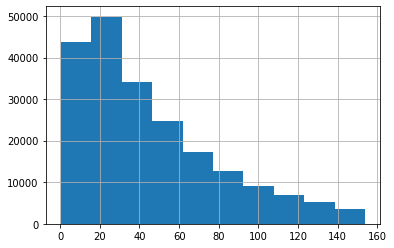

In [42]:
df_times.loc[df_times.is_outlier==False,'elapsed_time'].hist()

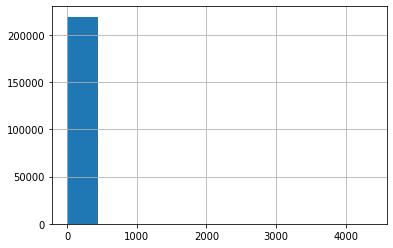

In [43]:
df_times.loc[:,'elapsed_time'].hist()

We know we meet SLA regulary, so we assume that is the base case:

In [44]:
df_times['delay']=(df_times.deadline_time-df_times.completed_at)/np.timedelta64(1,'D')
df_times['delay']=df_times.delay.apply(lambda x: 0 if x>=0 else -x)
df_times['sla_compliant']=df_times.delay.apply(lambda x: True if x==0 else False)

/Users/ggoni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ggoni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ggoni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

Otherwise, tag it

In [45]:
df_times.set_index(['package_id'],inplace=True)

In [46]:
df[['package_id','mesoregion']].groupby(['package_id'])['mesoregion'].nunique().max()

1

In [47]:
df[['package_id','real_weight']].groupby(['package_id'])['real_weight'].nunique().max()

1

In [48]:
df[['package_id','agreed_slo']].groupby(['package_id'])['agreed_slo'].nunique().max()

1

In [49]:
df[['package_id','transport_type']].groupby(['package_id'])['transport_type'].nunique().max()

2

In [50]:
df[['package_id','product_version']].groupby(['package_id'])['product_version'].nunique().max()

2

Note that nor product version, neither transport type are not unique for a package

In [51]:
df_count_tasks=df.groupby(['package_id'])['task_id'].count()

In [52]:
df_times=df_times.merge(df_count_tasks,how='left',left_index=True,right_index=True)

In [53]:
df_other_feat=df[['package_id','mesoregion','real_weight','agreed_slo']]

In [54]:
df_other_feat=df_other_feat.groupby(['package_id'])['mesoregion','real_weight','agreed_slo'].first()

/Users/ggoni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [55]:
df_times=df_times.merge(df_other_feat,how='left',left_index=True,right_index=True)

In [56]:
df_times.rename(columns={'task_id':'task_id_count'},inplace=True)

In [57]:
df_times.sla_compliant.mean()

0.9188194397109944

In [58]:
df_times.to_csv("data.csv")